In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import mysql.connector
from mysql.connector import Error
import pandas as pd

conn = mysql.connector.connect(
    host= "18.136.157.135",         
    database="project_sales",
    user= "dm_team2",      
    password='DM!$Team&27@9!20!'
)

In [3]:
cursor = conn.cursor()
query = ("use project_sales")
cursor.execute(query)

In [4]:
try:
    query1 = "SELECT * FROM data"  # Make sure the query is valid
    cursor.execute(query1)

    result = cursor.fetchall()

    # Check if any data is fetched and description is not None
    if cursor.description:
        columns = [i[0] for i in cursor.description]
        data = pd.DataFrame(result, columns=columns)
    else:
        print("No data was returned from the query or the query did not return a result set.")
except Exception as e:
    print(f"An error occurred: {e}")


finally:
    # Close the cursor and connection
    if conn.is_connected():
        cursor.close()
        conn.close()
        print("MySQL connection is closed")

MySQL connection is closed


In [5]:
data = data.replace({"": np.nan})

In [6]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7364 non-null   object
 2   Source         7405 non-null   object
 3   Mobile         5612 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7399 non-null   object
 6   Location       7364 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [8]:
data.Product_ID.value_counts()

Product_ID
18    1711
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
2       38
12      36
26      31
14      27
11      12
22       8
3        7
17       7
6        7
8        6
13       5
24       3
16       3
23       2
0        2
28       1
7        1
4        1
Name: count, dtype: int64

In [9]:
data.Source.value_counts()

Source
Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: count, dtype: int64

In [10]:
list((data.Location.value_counts() < 100).index)

['Other Locations',
 'Bangalore',
 'Chennai',
 'Hyderabad',
 'Delhi',
 'Mumbai',
 'Pune',
 'UAE',
 'Trivandrum',
 'Kolkata',
 'USA',
 'UK',
 'AUSTRALIA',
 'Singapore',
 'Malaysia',
 'EUROPE',
 'Howrah']

[Text(0, 0, '2500'),
 Text(0, 0, '2084'),
 Text(0, 0, '909'),
 Text(0, 0, '528'),
 Text(0, 0, '471'),
 Text(0, 0, '402'),
 Text(0, 0, '142'),
 Text(0, 0, '79'),
 Text(0, 0, '58'),
 Text(0, 0, '55'),
 Text(0, 0, '45'),
 Text(0, 0, '41'),
 Text(0, 0, '25'),
 Text(0, 0, '17'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '1')]

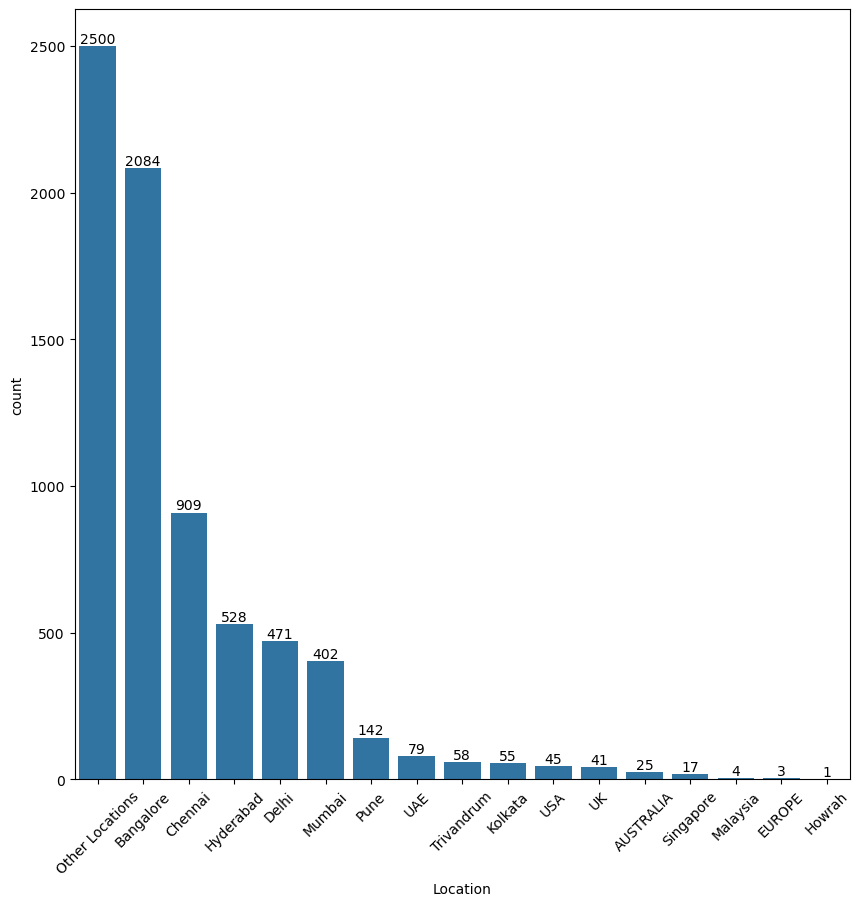

In [11]:
plt.figure(figsize=(10,10))

# Use Seaborn's countplot with the 'order' parameter sorted directly from value_counts
sns.countplot(x='Location', data=data, order=data['Location'].value_counts().index)
plt.xticks(rotation=45)

# Add annotations directly in a loop over patches
plt.gca().bar_label(plt.gca().containers[0])

In [12]:
data.loc[data["Location"] == "Howrah"] # Howrah is showing a weaker performance, with a significantly lower number of sales.

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
5773,07-06-2018 14:00,18,Live Chat-Blog,NaN,aXXXXXXXti@usa.net,Sales-Agent-5,Howrah,Mode-3,Junk Lead


In [13]:
data.Location.value_counts()

Location
Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: count, dtype: int64

In [14]:
data.Status.value_counts()

Status
Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: count, dtype: int64

In [15]:
data.loc[data["Status"] == "converted", "Status"] = "Converted"

In [16]:
data.loc[data["Status"] == "CONVERTED", "Status"] = "Converted"

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7364 non-null   object
 2   Source         7405 non-null   object
 3   Mobile         5612 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7399 non-null   object
 6   Location       7364 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [18]:
# Optionally reset the index if you want to keep duplicates and keep rows separate
# data = data.reset_index(drop=False)

In [19]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [20]:
data.Product_ID.value_counts()

Product_ID
18    1711
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
2       38
12      36
26      31
14      27
11      12
22       8
3        7
17       7
6        7
8        6
13       5
24       3
16       3
23       2
0        2
28       1
7        1
4        1
Name: count, dtype: int64

In [21]:
data.Sales_Agent.value_counts()

Sales_Agent
Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4
Name: count, dtype: int64

In [22]:
from ydata_profiling import ProfileReport
ProfileReport(data, title = "EDA", explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
data.drop_duplicates(keep='first',inplace=True)

In [24]:
data[data["Sales_Agent"] == "Sales-Agent-1"]
# We can't make prediction by using "Sales-Agent-1" Sales and their detail.
#So the Suggestion is "Sales-Agent-1" need to have some Courage on his Work.
#From this Analysis ""Sales-Agent-1"" doesn't give a Proper Response to the Customers. Because the Agent doesn't get 
#required details from the Customer. So some of the Customers won't be show their interest because of the Lethargic Response.

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
2556,29-08-2018 19:41,NaN,NaN,XXXXXXX,#VALUE!,Sales-Agent-1,NaN,Mode-5,Open
3051,15-08-2018 21:44,NaN,NaN,XXXXXXX,#VALUE!,Sales-Agent-1,NaN,Mode-5,Open
4979,25-06-2018 16:31,NaN,NaN,XXXXXXX,#VALUE!,Sales-Agent-1,NaN,Mode-5,Open
5258,19-06-2018 17:12,NaN,NaN,987XXXXXXX,#VALUE!,Sales-Agent-1,NaN,Mode-5,Open


In [25]:
data.drop(["Mobile", "EMAIL"],axis=1,inplace=True)

In [26]:
pd.set_option("display.max_rows", None)

In [27]:
print(data[data["Sales_Agent"] == "Sales-Agent-10"].shape)
data[data["Sales_Agent"] == "Sales-Agent-10"]

(47, 7)


,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
1,14-11-2018 09:22,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
5,14-11-2018 07:33,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
6,14-11-2018 05:58,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
7,14-11-2018 05:49,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
8,14-11-2018 05:40,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
9,14-11-2018 05:06,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
10,14-11-2018 05:03,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open


In [28]:
data.loc[(data["Sales_Agent"] == "Sales-Agent-10") & (data["Source"].isnull()), "Source"] = "Website"
# This Process helps to handle the Null Values, Because by Analysis "Sales-Agent-10" Mode-5 Delivery Mode is done through\
# website source only so the Null values were replaced with "Website".

In [29]:
print(data[data["Status"] == "Open"]["Product_ID"].shape)
print("Null Values in Product_ID where status is Open: ",data[data["Status"] == "Open"]["Product_ID"].isnull().sum())
#From this Analysis there must be chance of getting Product_ID is less Because Null Value is more when\
#compared Total No.of Product_ID with respect to the Status = ""Open""

(80,)
Null Values in Product_ID where status is Open:  47


In [30]:
data.loc[(data["Location"] == "Bangalore") & (data["Status"] == "Open")]
# From this Analysis in Bangalore Open Status Product_ID only have two unique values.
# So we decide to replace the Null Values in Product_ID column with respect to Bangalore is either 18.0 or 15.0

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
510,29-10-2018 10:18,18,Live Chat-Direct,Sales-Agent-8,Bangalore,Mode-1,Open
3262,09-08-2018 14:57,15,Live Chat-Direct,Sales-Agent-8,Bangalore,Mode-5,Open


In [31]:
data.loc[(data["Location"] == "Bangalore") & (data["Source"] == "Website"), "Product_ID"].value_counts()
# Here Mode-5 in Delivery Mode were made as Product_ID is 15.0. So we decide to replace the Null value as 15.0

Product_ID
18    123
19     57
27     45
9      42
5      29
15      8
1       7
20      6
12      5
10      5
25      4
26      3
2       2
6       1
16      1
17      1
21      1
Name: count, dtype: int64

In [32]:
data.loc[(data["Sales_Agent"] == "Sales-Agent-10") & (data["Source"] == "Website") & (data["Product_ID"].isnull()), "Product_ID"] = "15"

In [33]:
# data[(data["Location"] == "Bangalore") & (data["Source"] == "Website")]

In [34]:
data.loc[(data["Status"] == "Open") & (data["Sales_Agent"] == "Sales-Agent-10") & (data["Product_ID"].isnull()), "Product_ID"] = "15"

In [35]:
data.loc[data["Product_ID"].isnull()]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
23,13-11-2018 17:25,NaN,Call,Sales-Agent-9,UAE,Mode-3,In Progress Positive
1888,17-09-2018 18:55,NaN,Live Chat-Direct,Sales-Agent-5,Mumbai,Mode-3,Junk Lead
2556,29-08-2018 19:41,NaN,NaN,Sales-Agent-1,NaN,Mode-5,Open
2726,24-08-2018 15:20,NaN,Website,Sales-Agent-11,NaN,Mode-5,Just Enquiry
2727,24-08-2018 14:36,NaN,US Website,Sales-Agent-5,NaN,Mode-5,Not Responding
2729,24-08-2018 13:50,NaN,US Website,Sales-Agent-11,NaN,Mode-5,Just Enquiry
3023,16-08-2018 12:08,NaN,Call,Sales-Agent-5,Other Locations,Mode-5,Junk Lead
3051,15-08-2018 21:44,NaN,NaN,Sales-Agent-1,NaN,Mode-5,Open
3752,28-07-2018 12:25,NaN,Live Chat-Direct,Sales-Agent-5,Other Locations,Mode-5,Just Enquiry


In [36]:
# Here when it comes to EDA part we can't utilize "Sales-Agent-1" details. So we decided to drop that particular Four Rows.
data.loc[(data["Status"] == "Open") & (data["Sales_Agent"] == "Sales-Agent-1") & (data["Delivery_Mode"] == "Mode-5")]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
2556,29-08-2018 19:41,NaN,NaN,Sales-Agent-1,NaN,Mode-5,Open
3051,15-08-2018 21:44,NaN,NaN,Sales-Agent-1,NaN,Mode-5,Open
4979,25-06-2018 16:31,NaN,NaN,Sales-Agent-1,NaN,Mode-5,Open
5258,19-06-2018 17:12,NaN,NaN,Sales-Agent-1,NaN,Mode-5,Open


In [37]:
data = data.loc[(data["Sales_Agent"] != "Sales-Agent-1")]

In [38]:
data.loc[data["Location"].isnull()]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,15,Website,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,15,Website,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,15,Website,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,15,Website,Sales-Agent-10,NaN,Mode-5,Open
5,14-11-2018 07:33,15,Website,Sales-Agent-10,NaN,Mode-5,Open
6,14-11-2018 05:58,15,Website,Sales-Agent-10,NaN,Mode-5,Open
7,14-11-2018 05:49,15,Website,Sales-Agent-10,NaN,Mode-5,Open
8,14-11-2018 05:40,15,Website,Sales-Agent-10,NaN,Mode-5,Open
9,14-11-2018 05:06,15,Website,Sales-Agent-10,NaN,Mode-5,Open


In [39]:
data.loc[(data["Source"] == "Website") & (data["Delivery_Mode"] == "Mode-5") & data["Status"] == "Open" , "Location"].value_counts()
# By uing the Condition we can't find out the Location to fill the Null Values.

Series([], Name: count, dtype: int64)

In [40]:
data.loc[(data["Delivery_Mode"] == "Mode-5") & (data["Source"] == "US Website"), "Location"].value_counts()
# From this Analysis whenever it comes to US Website Source means the Location indiactes only "Other Locations".
# So wherever Null values filled with respect to "US Website" means that will be replaced by "Other Locations".

Location
Other Locations    90
Name: count, dtype: int64

In [41]:
data.loc[(data["Source"] == "US Website"), "Location"].value_counts()

Location
Other Locations    129
Bangalore            1
Name: count, dtype: int64

In [42]:
data.loc[(data["Source"] == "US Website") & (data["Delivery_Mode"] == "Mode-5") & (data["Location"].isnull()), "Location"] = "Other Locations"

In [43]:
data.loc[(data["Source"] == "Website") & (data["Delivery_Mode"] == "Mode-5") , "Location"].value_counts()

Location
Other Locations    219
Bangalore           90
Chennai             77
Delhi               35
Hyderabad           35
Mumbai              33
Pune                14
Kolkata             13
Trivandrum           8
UK                   3
UAE                  1
Malaysia             1
Name: count, dtype: int64

In [44]:
data.loc[(data["Sales_Agent"] == "Sales-Agent-10")]
# From this Analysis "Sales-Agent-10" had done with source of "Live Chat-Google Organic" and "Live Chat-Direct" and\
# Both Communication Source done on Bangalore Only. So we decided to replace the Null values as Bangalore.

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
1,14-11-2018 09:22,15,Website,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,15,Website,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,15,Website,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,15,Website,Sales-Agent-10,NaN,Mode-5,Open
5,14-11-2018 07:33,15,Website,Sales-Agent-10,NaN,Mode-5,Open
6,14-11-2018 05:58,15,Website,Sales-Agent-10,NaN,Mode-5,Open
7,14-11-2018 05:49,15,Website,Sales-Agent-10,NaN,Mode-5,Open
8,14-11-2018 05:40,15,Website,Sales-Agent-10,NaN,Mode-5,Open
9,14-11-2018 05:06,15,Website,Sales-Agent-10,NaN,Mode-5,Open
10,14-11-2018 05:03,15,Website,Sales-Agent-10,NaN,Mode-5,Open


In [45]:
data.loc[(data["Source"] == "Website") & (data["Sales_Agent"] == "Sales-Agent-10") & (data["Location"].isnull()), "Location"] = "Bangalore" 

In [46]:
data.loc[(data["Source"] == "Website") & (data["Delivery_Mode"] == "Mode-5") , "Status"].value_counts()

Status
Not Responding          119
Junk Lead               105
Just Enquiry             78
Potential                51
Converted                49
In Progress Negative     48
Open                     42
In Progress Positive     30
Long Term                30
LOST                     20
Name: count, dtype: int64

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7416 entries, 0 to 7421
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7416 non-null   object
 1   Product_ID     7406 non-null   object
 2   Source         7409 non-null   object
 3   Sales_Agent    7393 non-null   object
 4   Location       7410 non-null   object
 5   Delivery_Mode  7416 non-null   object
 6   Status         7416 non-null   object
dtypes: object(7)
memory usage: 463.5+ KB


In [48]:
data.loc[data.Location.isnull()]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
2726,24-08-2018 15:20,NaN,Website,Sales-Agent-11,NaN,Mode-5,Just Enquiry
4461,09-07-2018 14:05,20,Live Chat-Direct,Sales-Agent-4,NaN,Mode-5,Not Responding
5917,04-06-2018 22:32,15,Website,Sales-Agent-4,NaN,Mode-1,Not Responding
7001,08-05-2018 12:05,15,US Website,Sales-Agent-11,NaN,Mode-1,Just Enquiry
7301,01-05-2018 11:05,15,US Website,Sales-Agent-3,NaN,Mode-1,Junk Lead


In [49]:
data.loc[(data["Delivery_Mode"] == "Mode-5") & (data["Location"] == "Bangalore") & (data["Status"] == "Just Enquiry")]
# Based on the analysis of "Mode-5" delivery for the "Just Enquiry" status, which was conducted exclusively\
# for the Bangalore location, we have decided to replace any null values in the location field with "Bangalore."

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
556,26-10-2018 18:01,5,Live Chat-Direct,Sales-Agent-7,Bangalore,Mode-5,Just Enquiry
578,26-10-2018 11:26,18,Call,Sales-Agent-11,Bangalore,Mode-5,Just Enquiry
913,15-10-2018 12:38,15,Call,Sales-Agent-9,Bangalore,Mode-5,Just Enquiry
1334,02-10-2018 12:30,18,Live Chat -PPC,Sales-Agent-3,Bangalore,Mode-5,Just Enquiry
1532,26-09-2018 11:49,18,Call,Sales-Agent-11,Bangalore,Mode-5,Just Enquiry
1540,26-09-2018 11:29,9,Call,Sales-Agent-4,Bangalore,Mode-5,Just Enquiry
1916,17-09-2018 12:09,18,Call,Sales-Agent-11,Bangalore,Mode-5,Just Enquiry
1933,16-09-2018 17:30,5,Live Chat -PPC,Sales-Agent-11,Bangalore,Mode-5,Just Enquiry
2048,12-09-2018 13:28,18,Call,Sales-Agent-4,Bangalore,Mode-5,Just Enquiry
2068,11-09-2018 17:43,27,Call,Sales-Agent-3,Bangalore,Mode-5,Just Enquiry


In [50]:
data.loc[(data["Delivery_Mode"] == "Mode-5") & (data["Status"] == "Just Enquiry") & (data["Location"].isnull()), "Location"] = "Bangalore"

In [51]:
data.loc[(data["Delivery_Mode"] == "Mode-1") & (data["Location"] == "Bangalore") & (data["Status"] == "Just Enquiry")]


,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
212,08-11-2018 14:51,19,Website,Sales-Agent-4,Bangalore,Mode-1,Just Enquiry
225,07-11-2018 14:25,5,Call,Sales-Agent-3,Bangalore,Mode-1,Just Enquiry
232,07-11-2018 12:28,18,Live Chat -PPC,Sales-Agent-3,Bangalore,Mode-1,Just Enquiry
234,07-11-2018 12:25,5,Live Chat-Direct,Sales-Agent-3,Bangalore,Mode-1,Just Enquiry
267,05-11-2018 17:11,5,Live Chat-Direct,Sales-Agent-3,Bangalore,Mode-1,Just Enquiry
274,05-11-2018 15:42,19,Call,Sales-Agent-3,Bangalore,Mode-1,Just Enquiry
297,05-11-2018 10:20,27,Live Chat-Direct,Sales-Agent-4,Bangalore,Mode-1,Just Enquiry
445,30-10-2018 12:10,18,Live Chat -PPC,Sales-Agent-7,Bangalore,Mode-1,Just Enquiry
469,29-10-2018 17:41,2,Live Chat-Direct,Sales-Agent-3,Bangalore,Mode-1,Just Enquiry
569,26-10-2018 14:33,18,Live Chat-Direct,Sales-Agent-4,Bangalore,Mode-1,Just Enquiry


In [52]:
data.loc[(data["Delivery_Mode"] == "Mode-5") & (data["Source"] == "US Website")]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
2713,25-08-2018 04:00,15,US Website,Sales-Agent-5,Other Locations,Mode-5,Not Responding
2727,24-08-2018 14:36,NaN,US Website,Sales-Agent-5,Other Locations,Mode-5,Not Responding
2729,24-08-2018 13:50,NaN,US Website,Sales-Agent-11,Other Locations,Mode-5,Just Enquiry
2747,23-08-2018 21:04,15,US Website,Sales-Agent-11,Other Locations,Mode-5,Not Responding
2796,23-08-2018 01:45,15,US Website,Sales-Agent-11,Other Locations,Mode-5,Not Responding
2855,21-08-2018 15:18,15,US Website,Sales-Agent-11,Other Locations,Mode-5,Not Responding
3169,12-08-2018 18:23,15,US Website,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
3172,12-08-2018 16:35,15,US Website,Sales-Agent-11,Other Locations,Mode-5,Not Responding
3173,12-08-2018 16:27,15,US Website,Sales-Agent-4,Other Locations,Mode-5,Not Responding
3176,12-08-2018 15:58,15,US Website,Sales-Agent-11,Other Locations,Mode-5,Junk Lead


In [53]:
data.loc[(data["Source"] == "US Website") & data["Location"].isnull(), "Location"] = "Other Locations"

In [54]:
data.loc[(data["Delivery_Mode"] == "Mode-5") & (data["Source"] == "US Website")]
# From this Analysis Represents wherever "US Website" as a Source with respect to Delivery Mode as "Mode-5".\
# The Most Products ID's are 15. So we replace the Null value as 15.

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
2713,25-08-2018 04:00,15,US Website,Sales-Agent-5,Other Locations,Mode-5,Not Responding
2727,24-08-2018 14:36,NaN,US Website,Sales-Agent-5,Other Locations,Mode-5,Not Responding
2729,24-08-2018 13:50,NaN,US Website,Sales-Agent-11,Other Locations,Mode-5,Just Enquiry
2747,23-08-2018 21:04,15,US Website,Sales-Agent-11,Other Locations,Mode-5,Not Responding
2796,23-08-2018 01:45,15,US Website,Sales-Agent-11,Other Locations,Mode-5,Not Responding
2855,21-08-2018 15:18,15,US Website,Sales-Agent-11,Other Locations,Mode-5,Not Responding
3169,12-08-2018 18:23,15,US Website,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
3172,12-08-2018 16:35,15,US Website,Sales-Agent-11,Other Locations,Mode-5,Not Responding
3173,12-08-2018 16:27,15,US Website,Sales-Agent-4,Other Locations,Mode-5,Not Responding
3176,12-08-2018 15:58,15,US Website,Sales-Agent-11,Other Locations,Mode-5,Junk Lead


In [55]:
data.loc[(data.Location == "Other Locations") & (data.Product_ID).isnull(), "Product_ID"] = "15"

In [56]:
data.loc[(data["Source"] == "US Website") & data["Product_ID"].isnull(), "Product_ID"] = "15"

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7416 entries, 0 to 7421
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7416 non-null   object
 1   Product_ID     7412 non-null   object
 2   Source         7409 non-null   object
 3   Sales_Agent    7393 non-null   object
 4   Location       7413 non-null   object
 5   Delivery_Mode  7416 non-null   object
 6   Status         7416 non-null   object
dtypes: object(7)
memory usage: 463.5+ KB


In [58]:
data.loc[data.Location.isnull()]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
4461,09-07-2018 14:05,20,Live Chat-Direct,Sales-Agent-4,NaN,Mode-5,Not Responding
5917,04-06-2018 22:32,15,Website,Sales-Agent-4,NaN,Mode-1,Not Responding


In [59]:
data.loc[(data.Delivery_Mode == "Mode-5") & (data.Sales_Agent == "Sales-Agent-11") & (data["Source"] == "Website"), "Location"].value_counts()
# Frequent Delivery Location is "Other Locations". So we decided to replace the Null value as "Other Locations".

Location
Other Locations    54
Chennai            41
Hyderabad          20
Mumbai             15
Delhi              13
Bangalore          10
Kolkata             5
Trivandrum          4
Pune                2
UK                  1
Malaysia            1
Name: count, dtype: int64

In [60]:
data.loc[(data.Delivery_Mode == "Mode-5") & (data.Sales_Agent == "Sales-Agent-11") & (data["Source"] == "Website") & (data["Location"].isnull()), "Location"] = "Other Locations"

In [61]:
data.loc[(data.Delivery_Mode == "Mode-5") & (data.Sales_Agent == "Sales-Agent-11") & (data["Source"] == "Website"), "Product_ID"].value_counts()
# Maximum No.of Product_ID "15" as deliverd through "US Website" Source. \
# But here the Null Value Source is from "Website" So we decided to replace it as 18.

Product_ID
18    36
15    35
19    28
27    23
9     16
5      7
10     5
1      4
20     2
21     2
17     2
12     1
11     1
26     1
2      1
25     1
Name: count, dtype: int64

In [62]:
data.loc[(data.Delivery_Mode == "Mode-5") & (data.Sales_Agent == "Sales-Agent-11") & (data["Source"] == "Website") & (data["Product_ID"].isnull()), "Product_ID"] = "18"

In [63]:
data.loc[(data.Location == "UAE") & (data.Delivery_Mode == "Mode-3") & (data.Sales_Agent == "Sales-Agent-9")]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
23,13-11-2018 17:25,NaN,Call,Sales-Agent-9,UAE,Mode-3,In Progress Positive
57,13-11-2018 10:30,5,Live Chat-Direct,Sales-Agent-9,UAE,Mode-3,In Progress Positive
71,12-11-2018 15:25,9,Live Chat-Direct,Sales-Agent-9,UAE,Mode-3,In Progress Positive
351,02-11-2018 13:06,9,Live Chat-Google Organic,Sales-Agent-9,UAE,Mode-3,Converted
1903,17-09-2018 14:10,18,Live Chat-Direct,Sales-Agent-9,UAE,Mode-3,Potential


In [64]:
data.loc[(data.Location == "UAE") & (data.Delivery_Mode == "Mode-3") & (data.Sales_Agent == "Sales-Agent-9") & (data.Product_ID).isnull(), "Product_ID"] = "5"
# 23rd row product id Null value had been handled by the above analysis.

In [65]:
data.loc[(data.Location == "Mumbai") & (data.Delivery_Mode == "Mode-3") & (data.Sales_Agent == "Sales-Agent-5") & (data.Status == "Junk Lead") & (data.Source == "Live Chat-Direct")]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
1888,17-09-2018 18:55,NaN,Live Chat-Direct,Sales-Agent-5,Mumbai,Mode-3,Junk Lead
3276,09-08-2018 12:03,27,Live Chat-Direct,Sales-Agent-5,Mumbai,Mode-3,Junk Lead
3701,30-07-2018 12:03,27,Live Chat-Direct,Sales-Agent-5,Mumbai,Mode-3,Junk Lead
5483,14-06-2018 09:40,27,Live Chat-Direct,Sales-Agent-5,Mumbai,Mode-3,Junk Lead
6441,23-05-2018 09:30,27,Live Chat-Direct,Sales-Agent-5,Mumbai,Mode-3,Junk Lead


In [66]:
data.loc[(data.Location == "Mumbai") & (data.Delivery_Mode == "Mode-3") & (data.Sales_Agent == "Sales-Agent-5") & (data.Status == "Junk Lead") & (data.Source == "Live Chat-Direct") & (data.Product_ID).isnull(), "Product_ID"] = "27"
# From the aove analysis 27 is the repeated value so we decide to replace it instead of Nan Value.

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7416 entries, 0 to 7421
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7416 non-null   object
 1   Product_ID     7416 non-null   object
 2   Source         7409 non-null   object
 3   Sales_Agent    7393 non-null   object
 4   Location       7414 non-null   object
 5   Delivery_Mode  7416 non-null   object
 6   Status         7416 non-null   object
dtypes: object(7)
memory usage: 463.5+ KB


In [68]:
data.loc[(data["Sales_Agent"] == "Sales-Agent-10") & (data["Location"].notnull())]
# From this Analysis "Sales-Agent-10" Delivery Location only presence on "Bangalore" and "Other Locations" only.
# But if Source is "US Website" means The Location should be "Other Locations", otherwise we might be considered to fill\
# the Null values as "Bangalore".

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
1,14-11-2018 09:22,15,Website,Sales-Agent-10,Bangalore,Mode-5,Open
2,14-11-2018 09:21,15,Website,Sales-Agent-10,Bangalore,Mode-5,Open
3,14-11-2018 08:46,15,Website,Sales-Agent-10,Bangalore,Mode-5,Open
4,14-11-2018 07:34,15,Website,Sales-Agent-10,Bangalore,Mode-5,Open
5,14-11-2018 07:33,15,Website,Sales-Agent-10,Bangalore,Mode-5,Open
6,14-11-2018 05:58,15,Website,Sales-Agent-10,Bangalore,Mode-5,Open
7,14-11-2018 05:49,15,Website,Sales-Agent-10,Bangalore,Mode-5,Open
8,14-11-2018 05:40,15,Website,Sales-Agent-10,Bangalore,Mode-5,Open
9,14-11-2018 05:06,15,Website,Sales-Agent-10,Bangalore,Mode-5,Open
10,14-11-2018 05:03,15,Website,Sales-Agent-10,Bangalore,Mode-5,Open


In [69]:
data.loc[(data["Sales_Agent"] == "Sales-Agent-10") & (data["Location"].isnull()), "Location"] = "Bangalore"

In [70]:
data.loc[data.Location.isnull()]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
4461,09-07-2018 14:05,20,Live Chat-Direct,Sales-Agent-4,NaN,Mode-5,Not Responding
5917,04-06-2018 22:32,15,Website,Sales-Agent-4,NaN,Mode-1,Not Responding


In [71]:
data.loc[(data["Sales_Agent"] == "Sales-Agent-4") & (data["Product_ID"] == "15") & (data.Location.isnull()), "Location"] = "Other Locations"

In [72]:
data.loc[(data["Sales_Agent"] == "Sales-Agent-4") & (data["Product_ID"] == "20")  & (data["Delivery_Mode"] == "Mode-5") & (data["Status"] == "Not Responding") & (data.Location.notnull())]
# From this Analysis We decided to fill the Nulll value for the Location as "Other Locations"

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
711,22-10-2018 16:14,20,Live Chat-Direct,Sales-Agent-4,Other Locations,Mode-5,Not Responding


In [73]:
data.loc[(data["Sales_Agent"] == "Sales-Agent-4") & (data["Product_ID"] == "20")  & (data["Delivery_Mode"] == "Mode-5") & (data["Status"] == "Not Responding") & (data.Location.isnull()), "Location"] = "Other Locations"

In [74]:
data.loc[data.Source.isnull()]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
2518,30-08-2018 20:40,18,NaN,Sales-Agent-5,Other Locations,Mode-3,Not Responding
2686,26-08-2018 11:10,9,NaN,Sales-Agent-5,Mumbai,Mode-3,Just Enquiry
2712,25-08-2018 10:00,15,NaN,Sales-Agent-5,Mumbai,Mode-5,Junk Lead
2767,23-08-2018 14:40,15,NaN,Sales-Agent-11,Hyderabad,Mode-5,In Progress Negative
6627,17-05-2018 14:45,9,NaN,Sales-Agent-7,Bangalore,Mode-1,LOST
6886,10-05-2018 21:30,5,NaN,Sales-Agent-11,Other Locations,Mode-1,Potential
6910,10-05-2018 14:10,18,NaN,Sales-Agent-7,Chennai,Mode-1,Not Responding


In [75]:
data.loc[(data["Sales_Agent"] == "Sales-Agent-5") & (data["Delivery_Mode"] == "Mode-3") & (data["Status"] == "Not Responding") & (data["Location"] == "Other Locations") & (data["Product_ID"] == "18")]
# From this Analysis "Live Chat-Direct" Source is least repeadted one. So We decide fill the Null values as "Live Chat-Direct".

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
1596,25-09-2018 08:49,18,Website,Sales-Agent-5,Other Locations,Mode-3,Not Responding
1712,21-09-2018 20:00,18,Website,Sales-Agent-5,Other Locations,Mode-3,Not Responding
1885,18-09-2018 07:39,18,Website,Sales-Agent-5,Other Locations,Mode-3,Not Responding
2229,06-09-2018 13:35,18,Live Chat-Direct,Sales-Agent-5,Other Locations,Mode-3,Not Responding
2238,06-09-2018 11:55,18,Live Chat-Blog,Sales-Agent-5,Other Locations,Mode-3,Not Responding
2518,30-08-2018 20:40,18,NaN,Sales-Agent-5,Other Locations,Mode-3,Not Responding
2943,19-08-2018 16:23,18,Website,Sales-Agent-5,Other Locations,Mode-3,Not Responding
5768,07-06-2018 15:35,18,Live Chat-Blog,Sales-Agent-5,Other Locations,Mode-3,Not Responding


In [76]:
data.loc[(data["Sales_Agent"] == "Sales-Agent-5") & (data["Delivery_Mode"] == "Mode-3") & (data["Status"] == "Not Responding") & (data["Location"] == "Other Locations") & (data["Product_ID"] == "18") & (data["Source"].isnull()), "Source"] = "Live-Chat-Direct"

In [77]:
data.loc[(data["Sales_Agent"] == "Sales-Agent-5") & (data["Delivery_Mode"] == "Mode-3") & (data["Status"] == "Just Enquiry") & (data["Location"] == "Mumbai") & (data["Product_ID"] == "9")]
# From this Analysis "Live Chat-Google Ads" Source is least repeadted one. So We decide fill the Null values as "Live Chat-Google Ads".

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
2686,26-08-2018 11:10,9,NaN,Sales-Agent-5,Mumbai,Mode-3,Just Enquiry
4570,05-07-2018 18:10,9,Live Chat-Direct,Sales-Agent-5,Mumbai,Mode-3,Just Enquiry
4587,05-07-2018 13:30,9,Live Chat-Direct,Sales-Agent-5,Mumbai,Mode-3,Just Enquiry
5524,13-06-2018 12:10,9,Live Chat-Google Ads,Sales-Agent-5,Mumbai,Mode-3,Just Enquiry


In [78]:
data.loc[(data["Sales_Agent"] == "Sales-Agent-5") & (data["Delivery_Mode"] == "Mode-3") & (data["Status"] == "Just Enquiry") & (data["Location"] == "Mumbai") & (data["Product_ID"] == "9") & data["Source"].isnull(), "Source"] = "Live Chat-Google Ads" 

In [79]:
data.loc[(data["Sales_Agent"] == "Sales-Agent-5") & (data["Delivery_Mode"] == "Mode-5") & (data["Status"] == "Junk Lead") & (data["Location"] == "Mumbai") & (data["Product_ID"] == "15")]
# From this Analysis "Live Chat-Blog" Source is least repeadted one. So We decide fill the Null values as "Live Chat-Blog".

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
2712,25-08-2018 10:00,15,NaN,Sales-Agent-5,Mumbai,Mode-5,Junk Lead
4381,11-07-2018 12:35,15,Live Chat-Blog,Sales-Agent-5,Mumbai,Mode-5,Junk Lead


In [80]:
data.loc[(data["Sales_Agent"] == "Sales-Agent-5") & (data["Delivery_Mode"] == "Mode-5") & (data["Status"] == "Junk Lead") & (data["Location"] == "Mumbai") & (data["Product_ID"] == "15"), "Source"] = "Live Chat-Blog"

In [81]:
data.loc[(data["Sales_Agent"] == "Sales-Agent-11") & (data["Delivery_Mode"] == "Mode-5") & (data["Status"] == "In Progress Negative") & (data["Location"] == "Hyderabad")]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
2506,31-08-2018 11:24,19,Call,Sales-Agent-11,Hyderabad,Mode-5,In Progress Negative
2759,23-08-2018 17:05,18,Live Chat-Direct,Sales-Agent-11,Hyderabad,Mode-5,In Progress Negative
2767,23-08-2018 14:40,15,NaN,Sales-Agent-11,Hyderabad,Mode-5,In Progress Negative
2876,21-08-2018 12:05,27,Live Chat-Direct,Sales-Agent-11,Hyderabad,Mode-5,In Progress Negative
3039,16-08-2018 10:40,5,Live Chat -PPC,Sales-Agent-11,Hyderabad,Mode-5,In Progress Negative
3900,24-07-2018 16:09,27,Call,Sales-Agent-11,Hyderabad,Mode-5,In Progress Negative
4849,28-06-2018 13:16,26,Call,Sales-Agent-11,Hyderabad,Mode-5,In Progress Negative
4934,26-06-2018 15:35,18,Live Chat-Direct,Sales-Agent-11,Hyderabad,Mode-5,In Progress Negative
5144,21-06-2018 11:25,5,Call,Sales-Agent-11,Hyderabad,Mode-5,In Progress Negative
5437,14-06-2018 23:05,27,Website,Sales-Agent-11,Hyderabad,Mode-5,In Progress Negative


In [82]:
data.loc[(data["Sales_Agent"] == "Sales-Agent-11") & (data["Delivery_Mode"] == "Mode-5") & (data["Status"] == "In Progress Negative") & (data["Location"] == "Hyderabad"), "Product_ID"].value_counts()

Product_ID
27    4
18    2
5     2
19    1
15    1
26    1
Name: count, dtype: int64

In [83]:
data.loc[(data["Sales_Agent"] == "Sales-Agent-11") & (data["Delivery_Mode"] == "Mode-5") & (data["Status"] == "In Progress Negative") & (data["Location"] == "Hyderabad") & (data["Source"].isnull()), "Source"] = "27" 

In [84]:
data.loc[(data["Sales_Agent"] == "Sales-Agent-7") & (data["Delivery_Mode"] == "Mode-1") & (data["Status"] == "LOST") & (data["Location"] == "Bangalore") & (data["Product_ID"] == "9")]
# From this Analysis Other than "Live Chat-Direct", each source value is occuring on twice times. So we decide to replace\
# Least occuring value "Live Chat-Direct"

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
4532,06-07-2018 17:15,9,Call,Sales-Agent-7,Bangalore,Mode-1,LOST
6068,31-05-2018 14:16,9,Just Dial,Sales-Agent-7,Bangalore,Mode-1,LOST
6143,29-05-2018 22:40,9,Live Chat-Direct,Sales-Agent-7,Bangalore,Mode-1,LOST
6627,17-05-2018 14:45,9,NaN,Sales-Agent-7,Bangalore,Mode-1,LOST
6856,11-05-2018 14:22,9,Just Dial,Sales-Agent-7,Bangalore,Mode-1,LOST
7295,01-05-2018 16:33,9,Call,Sales-Agent-7,Bangalore,Mode-1,LOST


In [85]:
data.loc[(data["Sales_Agent"] == "Sales-Agent-7") & (data["Delivery_Mode"] == "Mode-1") & (data["Status"] == "LOST") & (data["Location"] == "Bangalore") & (data["Product_ID"] == "9") & data["Source"].isnull(), "Source"] = "Live Chat-Direct" 

In [86]:
data.loc[(data["Sales_Agent"] == "Sales-Agent-11") & (data["Delivery_Mode"] == "Mode-1") & (data["Status"] == "Potential") & (data["Location"] == "Other Locations") & (data["Product_ID"] == "5")]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
1656,23-09-2018 18:58,5,Website,Sales-Agent-11,Other Locations,Mode-1,Potential
6886,10-05-2018 21:30,5,NaN,Sales-Agent-11,Other Locations,Mode-1,Potential


In [87]:
data.loc[(data["Sales_Agent"] == "Sales-Agent-11") & (data["Delivery_Mode"] == "Mode-1") & (data["Status"] == "Potential") & (data["Location"] == "Other Locations") & (data["Product_ID"] == "5") & data["Source"].isnull(), "Source"] = "Website" 

In [88]:
data.loc[(data["Sales_Agent"] == "Sales-Agent-7") & (data["Delivery_Mode"] == "Mode-1") & (data["Location"] == "Chennai") & (data["Product_ID"] == "18")]
# Here "Website" and "Live Chat-Direct" Source is equally Occured. So we decided to replace the Null value as "Call" Source.\
# for training better Model.

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
103,12-11-2018 08:48,18,Website,Sales-Agent-7,Chennai,Mode-1,Potential
226,07-11-2018 14:22,18,Live Chat-Direct,Sales-Agent-7,Chennai,Mode-1,In Progress Positive
231,07-11-2018 12:31,18,Live Chat-Direct,Sales-Agent-7,Chennai,Mode-1,Just Enquiry
385,31-10-2018 18:02,18,Call,Sales-Agent-7,Chennai,Mode-1,Just Enquiry
617,25-10-2018 12:26,18,Live Chat-Direct,Sales-Agent-7,Chennai,Mode-1,In Progress Positive
795,18-10-2018 18:09,18,Website,Sales-Agent-7,Chennai,Mode-1,In Progress Positive
1228,05-10-2018 13:35,18,Live Chat-Direct,Sales-Agent-7,Chennai,Mode-1,In Progress Positive
1324,02-10-2018 21:28,18,Website,Sales-Agent-7,Chennai,Mode-1,Converted
1976,14-09-2018 18:36,18,Call,Sales-Agent-7,Chennai,Mode-1,Potential
6572,19-05-2018 01:26,18,Website,Sales-Agent-7,Chennai,Mode-1,Converted


In [89]:
data.loc[(data["Sales_Agent"] == "Sales-Agent-7") & (data["Delivery_Mode"] == "Mode-1") & (data["Location"] == "Chennai") & (data["Product_ID"] == "18") &data["Source"].isnull(), "Source"] = "Call"

In [90]:
data.loc[data["Sales_Agent"].isnull()]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
118,11-11-2018 12:35,5,Live Chat-Google Ads,NaN,Other Locations,Mode-5,Open
593,25-10-2018 18:02,15,Live Chat-Direct,NaN,Other Locations,Mode-5,Open
651,24-10-2018 11:01,18,Website,NaN,Delhi,Mode-5,Just Enquiry
658,24-10-2018 10:18,17,Live Chat-Google Organic,NaN,UAE,Mode-3,Open
681,23-10-2018 12:09,15,Live Chat-Google Organic,NaN,Other Locations,Mode-3,Open
690,23-10-2018 11:33,15,Call,NaN,Other Locations,Mode-5,Open
691,23-10-2018 11:31,15,Call,NaN,Other Locations,Mode-5,Not Responding
884,16-10-2018 10:06,24,Call,NaN,Other Locations,Mode-1,Open
1109,09-10-2018 12:55,18,Live Chat-Direct,NaN,Bangalore,Mode-1,Potential
1490,27-09-2018 11:00,15,Call,NaN,Other Locations,Mode-5,Open


In [91]:
data.loc[(data["Location"] == "Other Locations") & data["Sales_Agent"].isnull()]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
118,11-11-2018 12:35,5,Live Chat-Google Ads,NaN,Other Locations,Mode-5,Open
593,25-10-2018 18:02,15,Live Chat-Direct,NaN,Other Locations,Mode-5,Open
681,23-10-2018 12:09,15,Live Chat-Google Organic,NaN,Other Locations,Mode-3,Open
690,23-10-2018 11:33,15,Call,NaN,Other Locations,Mode-5,Open
691,23-10-2018 11:31,15,Call,NaN,Other Locations,Mode-5,Not Responding
884,16-10-2018 10:06,24,Call,NaN,Other Locations,Mode-1,Open
1490,27-09-2018 11:00,15,Call,NaN,Other Locations,Mode-5,Open
1734,21-09-2018 10:42,15,Call,NaN,Other Locations,Mode-5,Potential
3987,22-07-2018 13:10,27,Live Chat-Direct,NaN,Other Locations,Mode-5,Open
4375,11-07-2018 14:22,15,Call,NaN,Other Locations,Mode-5,Not Responding


In [92]:
data.loc[(data["Location"] == "Other Locations") & (data["Source"] == "Call") & data["Sales_Agent"].isnull()]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
690,23-10-2018 11:33,15,Call,NaN,Other Locations,Mode-5,Open
691,23-10-2018 11:31,15,Call,NaN,Other Locations,Mode-5,Not Responding
884,16-10-2018 10:06,24,Call,NaN,Other Locations,Mode-1,Open
1490,27-09-2018 11:00,15,Call,NaN,Other Locations,Mode-5,Open
1734,21-09-2018 10:42,15,Call,NaN,Other Locations,Mode-5,Potential
4375,11-07-2018 14:22,15,Call,NaN,Other Locations,Mode-5,Not Responding
5901,05-06-2018 09:51,15,Call,NaN,Other Locations,Mode-5,Open


In [93]:
data.loc[(data["Location"] == "Other Locations") & (data["Source"] == "Call") & (data["Delivery_Mode"] == "Mode-5") & (data["Status"] == "Open") & data["Sales_Agent"].notnull()]
# Here Most frequently repeatd Sales_Agent is "Sales-Agent-8".

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
97,12-11-2018 13:00,15,Call,Sales-Agent-3,Other Locations,Mode-5,Open
288,05-11-2018 12:06,15,Call,Sales-Agent-8,Other Locations,Mode-5,Open
810,18-10-2018 11:05,15,Call,Sales-Agent-8,Other Locations,Mode-5,Open
1896,17-09-2018 15:44,15,Call,Sales-Agent-8,Other Locations,Mode-5,Open
2007,14-09-2018 10:45,15,Call,Sales-Agent-8,Other Locations,Mode-5,Open
2547,30-08-2018 10:27,15,Call,Sales-Agent-8,Other Locations,Mode-5,Open
4954,26-06-2018 09:52,15,Call,Sales-Agent-8,Other Locations,Mode-5,Open
5016,25-06-2018 10:24,15,Call,Sales-Agent-8,Other Locations,Mode-5,Open
5059,23-06-2018 10:10,9,Call,Sales-Agent-8,Other Locations,Mode-5,Open


In [94]:
data.loc[(data["Location"] == "Other Locations") & (data["Source"] == "Call") & (data["Delivery_Mode"] == "Mode-5") & (data["Status"] == "Open") & data["Sales_Agent"].isnull(), "Sales_Agent"] = "Sales-Agent-8"

In [95]:
data.loc[(data["Location"] == "Other Locations") & data["Sales_Agent"].isnull()]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
118,11-11-2018 12:35,5,Live Chat-Google Ads,NaN,Other Locations,Mode-5,Open
593,25-10-2018 18:02,15,Live Chat-Direct,NaN,Other Locations,Mode-5,Open
681,23-10-2018 12:09,15,Live Chat-Google Organic,NaN,Other Locations,Mode-3,Open
691,23-10-2018 11:31,15,Call,NaN,Other Locations,Mode-5,Not Responding
884,16-10-2018 10:06,24,Call,NaN,Other Locations,Mode-1,Open
1734,21-09-2018 10:42,15,Call,NaN,Other Locations,Mode-5,Potential
3987,22-07-2018 13:10,27,Live Chat-Direct,NaN,Other Locations,Mode-5,Open
4375,11-07-2018 14:22,15,Call,NaN,Other Locations,Mode-5,Not Responding
5321,18-06-2018 17:05,15,Live Chat-Google Organic,NaN,Other Locations,Mode-2,Open
6957,09-05-2018 12:45,5,Live Chat-Google Organic,NaN,Other Locations,Mode-4,Open


In [96]:
data.loc[(data["Location"] == "Other Locations") & (data["Source"] == "Call") & (data["Location"] == "Other Locations") & (data["Source"] == "Call") & (data["Delivery_Mode"] == "Mode-5") & (data["Status"] == "Not Responding") & data["Sales_Agent"].isnull()]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
691,23-10-2018 11:31,15,Call,NaN,Other Locations,Mode-5,Not Responding
4375,11-07-2018 14:22,15,Call,NaN,Other Locations,Mode-5,Not Responding


In [97]:
data.loc[(data["Product_ID"] == "15") & (data["Location"] == "Other Locations") & (data["Source"] == "Call") & (data["Location"] == "Other Locations") & (data["Source"] == "Call") & (data["Delivery_Mode"] == "Mode-5") & (data["Status"] == "Not Responding") & data["Sales_Agent"].notnull(), "Sales_Agent"].value_counts()
# Here more frequently repeated agent is "Sales-Agent-11".

Sales_Agent
Sales-Agent-11    54
Sales-Agent-5     50
Sales-Agent-4     49
Sales-Agent-9     25
Sales-Agent-3     17
Sales-Agent-7     16
Sales-Agent-2      2
Sales-Agent-8      1
Name: count, dtype: int64

In [98]:
data.loc[(data["Product_ID"] == "15") & (data["Location"] == "Other Locations") & (data["Source"] == "Call") & (data["Location"] == "Other Locations") & (data["Source"] == "Call") & (data["Delivery_Mode"] == "Mode-5") & (data["Status"] == "Not Responding") & data["Sales_Agent"].isnull(), "Sales_Agent"] = "Sales-Agent-11"

In [99]:
data.loc[(data["Location"] == "Other Locations") & (data["Source"] == "Call") & (data["Location"] == "Other Locations") & (data["Source"] == "Call") & (data["Delivery_Mode"] == "Mode-5") & (data["Status"] == "Potential") & data["Sales_Agent"].isnull()]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
1734,21-09-2018 10:42,15,Call,NaN,Other Locations,Mode-5,Potential


In [100]:
data.loc[(data["Product_ID"] == "15") & (data["Location"] == "Other Locations") & (data["Source"] == "Call") & (data["Delivery_Mode"] == "Mode-5") & (data["Status"] == "Potential"), "Sales_Agent"].value_counts()
# here "Sales-Agent-11" is a Repeated one.

Sales_Agent
Sales-Agent-11    31
Sales-Agent-4      1
Sales-Agent-7      1
Name: count, dtype: int64

In [101]:
data.loc[(data["Product_ID"] == "15") & (data["Location"] == "Other Locations") & (data["Source"] == "Call") & (data["Delivery_Mode"] == "Mode-5") & (data["Status"] == "Potential") & (data["Sales_Agent"].isnull()), "Sales_Agent"] = "Sales-Agent-11"

In [102]:
data.loc[(data["Location"] == "Other Locations") & data["Sales_Agent"].isnull()]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
118,11-11-2018 12:35,5,Live Chat-Google Ads,NaN,Other Locations,Mode-5,Open
593,25-10-2018 18:02,15,Live Chat-Direct,NaN,Other Locations,Mode-5,Open
681,23-10-2018 12:09,15,Live Chat-Google Organic,NaN,Other Locations,Mode-3,Open
884,16-10-2018 10:06,24,Call,NaN,Other Locations,Mode-1,Open
3987,22-07-2018 13:10,27,Live Chat-Direct,NaN,Other Locations,Mode-5,Open
5321,18-06-2018 17:05,15,Live Chat-Google Organic,NaN,Other Locations,Mode-2,Open
6957,09-05-2018 12:45,5,Live Chat-Google Organic,NaN,Other Locations,Mode-4,Open


In [103]:
data.loc[(data["Location"] == "Other Locations") & (data["Source"] == "Live Chat-Direct") & (data["Delivery_Mode"] == "Mode-5") & (data["Status"] == "Open") &  data["Sales_Agent"].notnull()]
# here "Sales-Agent-8" is only present.

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
3746,28-07-2018 14:23,19,Live Chat-Direct,Sales-Agent-8,Other Locations,Mode-5,Open


In [104]:
data.loc[(data["Location"] == "Other Locations") & (data["Source"] == "Live Chat-Direct") & (data["Delivery_Mode"] == "Mode-5") & (data["Status"] == "Open") &  data["Sales_Agent"].isnull(), "Sales_Agent"] = "Sales-Agent-8"

In [105]:
data.loc[(data["Product_ID"] == "24") & (data["Sales_Agent"].notnull())]
# Product_ID "24" is having less Sales. By Analysis "Sales-Agent-3" might be possible to deliver the Product.

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
784,20-10-2018 08:05,24,Website,Sales-Agent-3,Other Locations,Mode-5,Just Enquiry
5871,05-06-2018 18:16,24,Website,Sales-Agent-11,Mumbai,Mode-1,Junk Lead


In [106]:
data.loc[(data["Location"] == "Other Locations") & (data["Source"] == "Call") & (data["Status"] == "Open") & data["Sales_Agent"].isnull(), "Sales_Agent"] = "Sales-Agent-3"

In [107]:
data.loc[(data["Product_ID"] == "15") & (data["Source"] == "Live Chat-Google Organic") & (data["Sales_Agent"].notnull())]
# here "Sales-Agent-3" is occured twice times.

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
631,25-10-2018 10:28,15,Live Chat-Google Organic,Sales-Agent-3,Chennai,Mode-1,Junk Lead
2122,10-09-2018 12:55,15,Live Chat-Google Organic,Sales-Agent-8,Bangalore,Mode-1,Not Responding
2257,06-09-2018 09:55,15,Live Chat-Google Organic,Sales-Agent-12,Bangalore,Mode-1,In Progress Negative
5323,18-06-2018 16:50,15,Live Chat-Google Organic,Sales-Agent-10,Other Locations,Mode-4,Junk Lead
6918,10-05-2018 12:30,15,Live Chat-Google Organic,Sales-Agent-6,Other Locations,Mode-1,Junk Lead
6933,09-05-2018 20:50,15,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-4,In Progress Negative


In [108]:
data.loc[(data["Product_ID"] == "15") & (data["Source"] == "Live Chat-Google Organic") & (data["Sales_Agent"].isnull()), "Sales_Agent"] = "Sales-Agent-3"

In [109]:
data.loc[(data["Product_ID"] == "5") & (data["Source"] == "Live Chat-Google Organic") & (data["Location"] == "Other Locations") & (data["Sales_Agent"].notnull())]
# here "Sales-Agent-11" is only present.

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
7143,04-05-2018 15:35,5,Live Chat-Google Organic,Sales-Agent-11,Other Locations,Mode-1,In Progress Negative


In [110]:
data.loc[(data["Product_ID"] == "5") & (data["Source"] == "Live Chat-Google Organic") & (data["Location"] == "Other Locations") & (data["Sales_Agent"].isnull()), "Sales_Agent"]  = "Sales-Agent-11"

In [111]:
data.loc[(data["Product_ID"] == "5") & (data["Source"] == "Live Chat-Google Ads") & (data["Location"] == "Other Locations") & (data["Sales_Agent"].notnull())]
# here "Sales-Agent-5" is only present.

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
106,11-11-2018 20:30,5,Live Chat-Google Ads,Sales-Agent-9,Other Locations,Mode-3,Not Responding
2993,17-08-2018 10:05,5,Live Chat-Google Ads,Sales-Agent-5,Other Locations,Mode-5,Junk Lead


In [112]:
data.loc[(data["Product_ID"] == "5") & (data["Source"] == "Live Chat-Google Ads") & (data["Location"] == "Other Locations") & (data["Delivery_Mode"] == "Mode-5") & (data["Sales_Agent"].isnull()), "Sales_Agent"] = "Sales-Agent-5"

In [113]:
data.loc[(data["Status"] == "Open") & (data["Location"] == "Pune") & data["Sales_Agent"].isnull()]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
4080,18-07-2018 18:10,15,Live Chat-CPC,NaN,Pune,Mode-1,Open
5780,07-06-2018 12:00,13,Call,NaN,Pune,Mode-5,Open


In [114]:
data.loc[(data["Source"] == "Live Chat-CPC") & (data["Location"] == "Pune") & (data["Delivery_Mode"] == "Mode-1") & data["Sales_Agent"].notnull()]
# here "Sales-Agent-1" is only present.

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
6362,24-05-2018 15:45,18,Live Chat-CPC,Sales-Agent-3,Pune,Mode-1,Converted


In [115]:
data.loc[(data["Source"] == "Live Chat-CPC") & (data["Location"] == "Pune") & (data["Delivery_Mode"] == "Mode-1") & data["Sales_Agent"].isnull(), "Sales_Agent"] = "Sales-Agent-1"


In [116]:
data.loc[(data["Source"] == "Call") & (data["Location"] == "Pune") & (data["Delivery_Mode"] == "Mode-5") & data["Sales_Agent"].notnull()]
# here "Sales-Agent-11" occurs more.

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
700,23-10-2018 10:17,27,Call,Sales-Agent-4,Pune,Mode-5,Not Responding
3935,23-07-2018 18:15,15,Call,Sales-Agent-5,Pune,Mode-5,In Progress Negative
3974,23-07-2018 10:37,2,Call,Sales-Agent-4,Pune,Mode-5,Junk Lead
4300,13-07-2018 12:10,9,Call,Sales-Agent-11,Pune,Mode-5,Junk Lead
4483,09-07-2018 10:49,19,Call,Sales-Agent-11,Pune,Mode-5,Potential
4929,26-06-2018 16:59,18,Call,Sales-Agent-11,Pune,Mode-5,Long Term
5012,25-06-2018 10:26,18,Call,Sales-Agent-11,Pune,Mode-5,Converted
5188,20-06-2018 15:58,27,Call,Sales-Agent-4,Pune,Mode-5,Converted
5497,13-06-2018 18:15,5,Call,Sales-Agent-11,Pune,Mode-5,Not Responding
5501,13-06-2018 16:38,5,Call,Sales-Agent-11,Pune,Mode-5,Potential


In [117]:
data.loc[(data["Source"] == "Call") & (data["Location"] == "Pune") & (data["Delivery_Mode"] == "Mode-5") & data["Sales_Agent"].isnull(), "Sales_Agent"] = "Sales-Agent-11"

In [118]:
data.loc[data["Sales_Agent"].isnull()]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
651,24-10-2018 11:01,18,Website,NaN,Delhi,Mode-5,Just Enquiry
658,24-10-2018 10:18,17,Live Chat-Google Organic,NaN,UAE,Mode-3,Open
1109,09-10-2018 12:55,18,Live Chat-Direct,NaN,Bangalore,Mode-1,Potential
2946,19-08-2018 14:00,19,Live Chat-Google Organic,NaN,Bangalore,Mode-1,Just Enquiry
4229,15-07-2018 18:22,15,Website,NaN,Pune,Mode-5,Not Responding
5784,07-06-2018 11:20,1,Live Chat-Direct,NaN,Chennai,Mode-1,Open
7099,05-05-2018 12:47,21,CRM form,NaN,Bangalore,Mode-1,Just Enquiry
7101,05-05-2018 11:58,27,Call,NaN,Bangalore,Mode-1,Just Enquiry


In [119]:
data.loc[(data["Product_ID"] == "17") & data["Sales_Agent"].notnull()]
# here "Sales-Agent-11" occurs three times.

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
3347,07-08-2018 14:47,17,Website,Sales-Agent-11,Trivandrum,Mode-5,Potential
5723,08-06-2018 14:56,17,Website,Sales-Agent-2,Bangalore,Mode-1,Junk Lead
5736,08-06-2018 12:20,17,Website,Sales-Agent-11,Chennai,Mode-5,Junk Lead
5760,07-06-2018 19:23,17,Website,Sales-Agent-5,Trivandrum,Mode-3,Not Responding
6172,29-05-2018 13:25,17,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,In Progress Negative
7077,06-05-2018 15:45,17,Live Chat-Direct,Sales-Agent-3,Hyderabad,Mode-1,Junk Lead


In [120]:
data.loc[(data["Product_ID"] == "17") & data["Sales_Agent"].isnull(), "Sales_Agent"] = "Sales-Agent-11"

In [121]:
data.loc[(data["Product_ID"] == "19") & (data["Source"] == "Live Chat-Google Organic") & (data["Location"] == "Bangalore") & (data["Delivery_Mode"] == "Mode-1") & (data["Status"] == "Just Enquiry") & data["Sales_Agent"].notnull()]
# here "Sales-Agent-9" is only present.

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
6961,09-05-2018 12:25,19,Live Chat-Google Organic,Sales-Agent-9,Bangalore,Mode-1,Just Enquiry


In [122]:
data.loc[(data["Product_ID"] == "19") & (data["Source"] == "Live Chat-Google Organic") & (data["Location"] == "Bangalore") & (data["Delivery_Mode"] == "Mode-1") & (data["Status"] == "Just Enquiry") & data["Sales_Agent"].isnull(), "Sales_Agent"] = "Sales-Agent-9"

In [123]:
data.loc[data["Sales_Agent"].isnull()]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
651,24-10-2018 11:01,18,Website,NaN,Delhi,Mode-5,Just Enquiry
1109,09-10-2018 12:55,18,Live Chat-Direct,NaN,Bangalore,Mode-1,Potential
4229,15-07-2018 18:22,15,Website,NaN,Pune,Mode-5,Not Responding
5784,07-06-2018 11:20,1,Live Chat-Direct,NaN,Chennai,Mode-1,Open
7099,05-05-2018 12:47,21,CRM form,NaN,Bangalore,Mode-1,Just Enquiry
7101,05-05-2018 11:58,27,Call,NaN,Bangalore,Mode-1,Just Enquiry


In [124]:
data.loc[(data["Product_ID"] == "18") & (data["Source"] == "Live Chat-Direct") & (data["Location"] == "Bangalore") & (data["Delivery_Mode"] == "Mode-1") & (data["Status"] == "Potential") & data["Sales_Agent"].notnull()]
# here "Sales-Agent-5" occurs only one time.

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
309,03-11-2018 16:58,18,Live Chat-Direct,Sales-Agent-4,Bangalore,Mode-1,Potential
484,29-10-2018 11:57,18,Live Chat-Direct,Sales-Agent-5,Bangalore,Mode-1,Potential
1280,03-10-2018 22:40,18,Live Chat-Direct,Sales-Agent-4,Bangalore,Mode-1,Potential
1715,21-09-2018 19:00,18,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Potential
1851,18-09-2018 14:20,18,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Potential
1879,18-09-2018 10:45,18,Live Chat-Direct,Sales-Agent-9,Bangalore,Mode-1,Potential
2181,07-09-2018 18:30,18,Live Chat-Direct,Sales-Agent-4,Bangalore,Mode-1,Potential
3353,07-08-2018 13:08,18,Live Chat-Direct,Sales-Agent-9,Bangalore,Mode-1,Potential
5094,22-06-2018 12:05,18,Live Chat-Direct,Sales-Agent-9,Bangalore,Mode-1,Potential


In [125]:
data.loc[(data["Product_ID"] == "18") & (data["Source"] == "Live Chat-Direct") & (data["Location"] == "Bangalore") & (data["Delivery_Mode"] == "Mode-1") & (data["Status"] == "Potential") & data["Sales_Agent"].isnull(), "Sales_Agent"] = "Sales-Agent-5"

In [126]:
data.loc[(data["Product_ID"] == "1") & (data["Source"] == "Live Chat-Direct") & (data["Location"] == "Chennai") & (data["Delivery_Mode"] == "Mode-1") & data["Sales_Agent"].isnull(), "Sales_Agent"] = "Sales-Agent-5"

In [127]:
data.loc[(data["Product_ID"] == "18") & (data["Source"] == "Website") & (data["Status"] == "Just Enquiry") & (data["Delivery_Mode"] == "Mode-5") & data["Sales_Agent"].notnull(), "Sales_Agent"].value_counts()

Sales_Agent
Sales-Agent-4     10
Sales-Agent-11     5
Sales-Agent-5      2
Sales-Agent-7      1
Sales-Agent-3      1
Sales-Agent-9      1
Name: count, dtype: int64

In [128]:
data.loc[(data["Product_ID"] == "18") & (data["Source"] == "Website") & (data["Status"] == "Just Enquiry") & (data["Delivery_Mode"] == "Mode-5") & data["Sales_Agent"].isnull(), "Sales_Agent"] = "Sales-Agent-4"

In [129]:
data.loc[(data["Product_ID"] == "15") & (data["Source"] == "Website") & (data["Location"] == "Pune") & (data["Delivery_Mode"] == "Mode-5") & (data["Status"] == "Not Responding") & data["Sales_Agent"].notnull()]
# here "Sales-Agent-4" occurs only one time.

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
4844,28-06-2018 14:33,15,Website,Sales-Agent-4,Pune,Mode-5,Not Responding


In [130]:
data.loc[(data["Product_ID"] == "15") & (data["Source"] == "Website") & (data["Location"] == "Pune") & (data["Delivery_Mode"] == "Mode-5") & (data["Status"] == "Not Responding") & data["Sales_Agent"].isnull(), "Sales_Agent"] = "Sales-Agent-4"

In [131]:
data.loc[(data["Product_ID"] == "21") & (data["Source"] == "CRM form") & (data["Location"] == "Bangalore") & (data["Delivery_Mode"] == "Mode-1") & data["Sales_Agent"].notnull()]
# # here "Sales-Agent-4" occurs only one time.

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
7127,04-05-2018 20:10,21,CRM form,Sales-Agent-4,Bangalore,Mode-1,Potential
7286,01-05-2018 22:09,21,CRM form,Sales-Agent-4,Bangalore,Mode-1,Converted
7303,01-05-2018 07:25,21,CRM form,Sales-Agent-4,Bangalore,Mode-1,Converted
7387,29-04-2018 09:44,21,CRM form,Sales-Agent-11,Bangalore,Mode-1,Converted


In [132]:
data.loc[(data["Product_ID"] == "21") & (data["Source"] == "CRM form") & (data["Location"] == "Bangalore") & (data["Delivery_Mode"] == "Mode-1") & data["Sales_Agent"].isnull(), "Sales_Agent"] = "Sales-Agent-4"

In [133]:
data.loc[(data["Product_ID"] == "27") & (data["Source"] == "Call") & (data["Location"] == "Bangalore") & (data["Delivery_Mode"] == "Mode-1") & data["Sales_Agent"].notnull(), "Sales_Agent"].value_counts()
# here "Sales-Agent-3" occurs more Number of times.

Sales_Agent
Sales-Agent-3     11
Sales-Agent-9      5
Sales-Agent-2      5
Sales-Agent-5      5
Sales-Agent-4      4
Sales-Agent-7      3
Sales-Agent-8      1
Sales-Agent-12     1
Sales-Agent-11     1
Name: count, dtype: int64

In [134]:
data.loc[(data["Product_ID"] == "27") & (data["Source"] == "Call") & (data["Location"] == "Bangalore") & (data["Delivery_Mode"] == "Mode-1") & data["Sales_Agent"].isnull(), "Sales_Agent"] = "Sales-Agent-3"

In [135]:
data.loc[data.Status == "Other Locations"]

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7416 entries, 0 to 7421
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7416 non-null   object
 1   Product_ID     7416 non-null   object
 2   Source         7416 non-null   object
 3   Sales_Agent    7416 non-null   object
 4   Location       7416 non-null   object
 5   Delivery_Mode  7416 non-null   object
 6   Status         7416 non-null   object
dtypes: object(7)
memory usage: 463.5+ KB


[Text(0, 0, '2510'),
 Text(0, 0, '2126'),
 Text(0, 0, '909'),
 Text(0, 0, '528'),
 Text(0, 0, '471'),
 Text(0, 0, '402'),
 Text(0, 0, '142'),
 Text(0, 0, '79'),
 Text(0, 0, '58'),
 Text(0, 0, '55'),
 Text(0, 0, '45'),
 Text(0, 0, '41'),
 Text(0, 0, '25'),
 Text(0, 0, '17'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '1')]

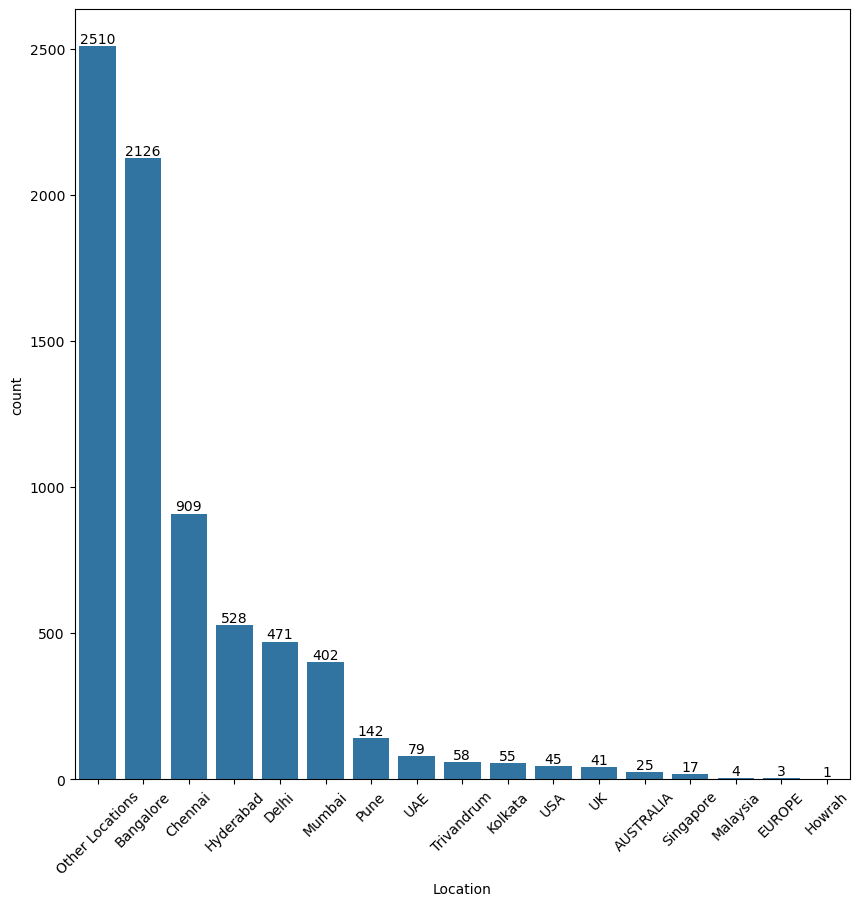

In [137]:
plt.figure(figsize=(10,10))

# Use Seaborn's countplot with the 'order' parameter sorted directly from value_counts
sns.countplot(x='Location', data=data, order=data['Location'].value_counts().index)
plt.xticks(rotation=45)

# Add annotations directly in a loop over patches
plt.gca().bar_label(plt.gca().containers[0])

In [ ]:
m

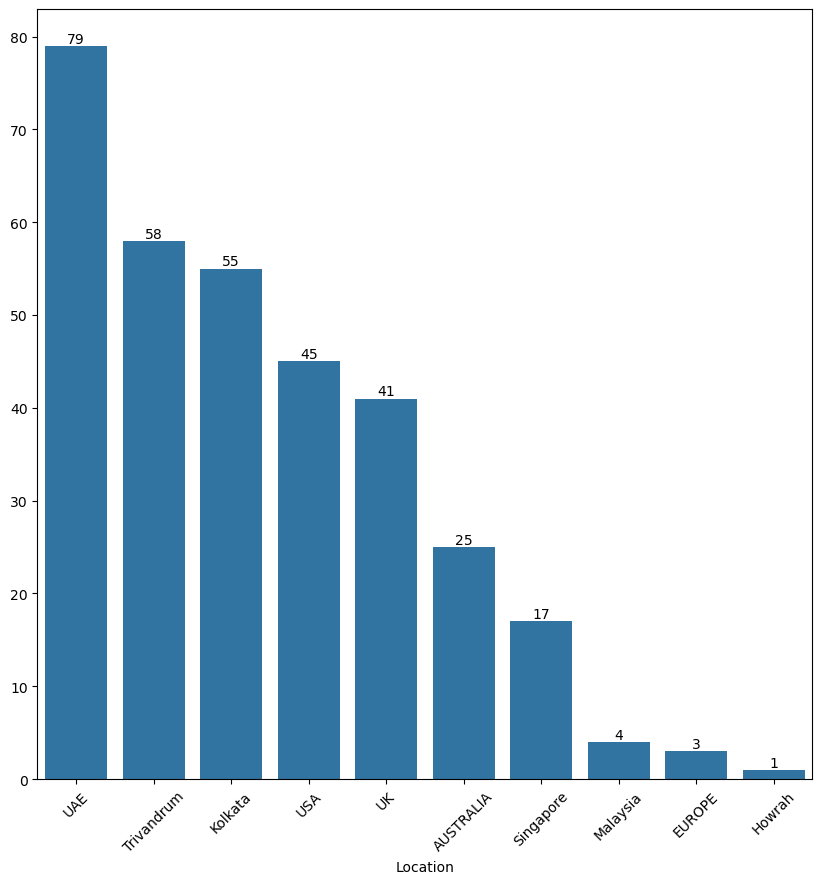

In [138]:
plt.figure(figsize=(10,10))

# Filter values where count is less than 100
values_less_than_100 = data['Location'].value_counts()[data['Location'].value_counts() < 100]

plt.xticks(rotation=45)

# Create a bar plot for values with counts less than 100
sns.barplot(x=values_less_than_100.index, y=values_less_than_100.values)

# Add labels to the bars
plt.gca().bar_label(plt.gca().containers[0])

plt.show()

## The sales agents need to enhance their product sales in the highlighted locations.

[Text(0, 0, '1503'),
 Text(0, 0, '1426'),
 Text(0, 0, '1193'),
 Text(0, 0, '880'),
 Text(0, 0, '785'),
 Text(0, 0, '736'),
 Text(0, 0, '389'),
 Text(0, 0, '269'),
 Text(0, 0, '114'),
 Text(0, 0, '73'),
 Text(0, 0, '47'),
 Text(0, 0, '1')]

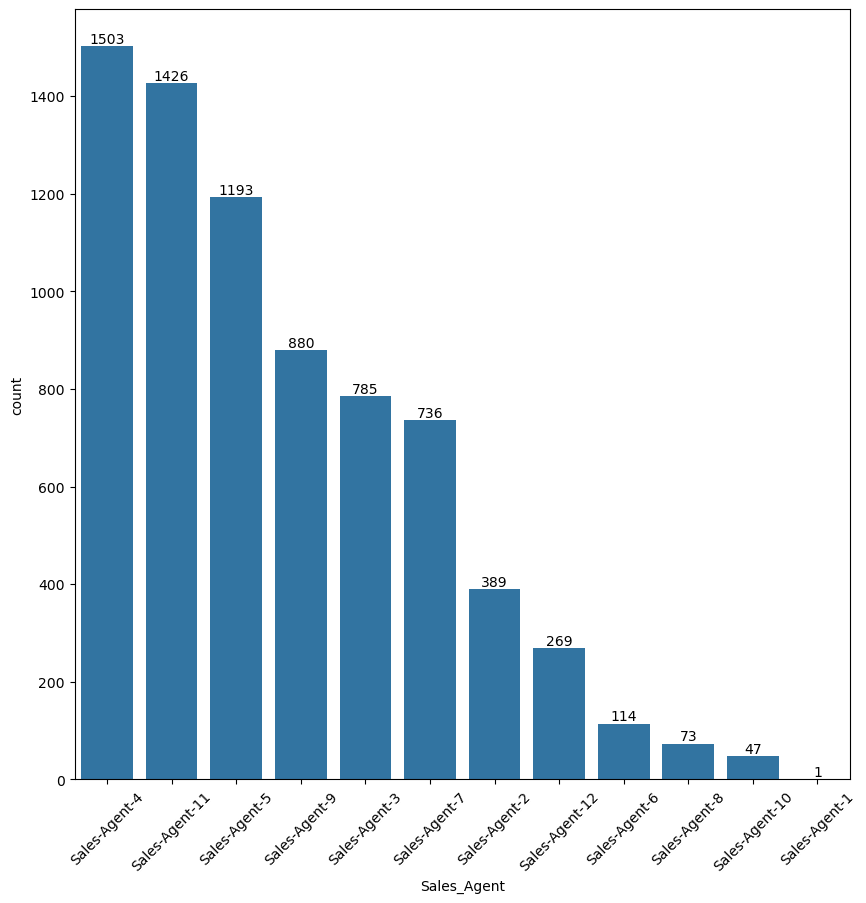

In [139]:
plt.figure(figsize=(10,10))

# Use Seaborn's countplot with the 'order' parameter sorted directly from value_counts
sns.countplot(x='Sales_Agent', data=data, order=data['Sales_Agent'].value_counts().index)
plt.xticks(rotation=45)

# Add annotations directly in a loop over patches
plt.gca().bar_label(plt.gca().containers[0])

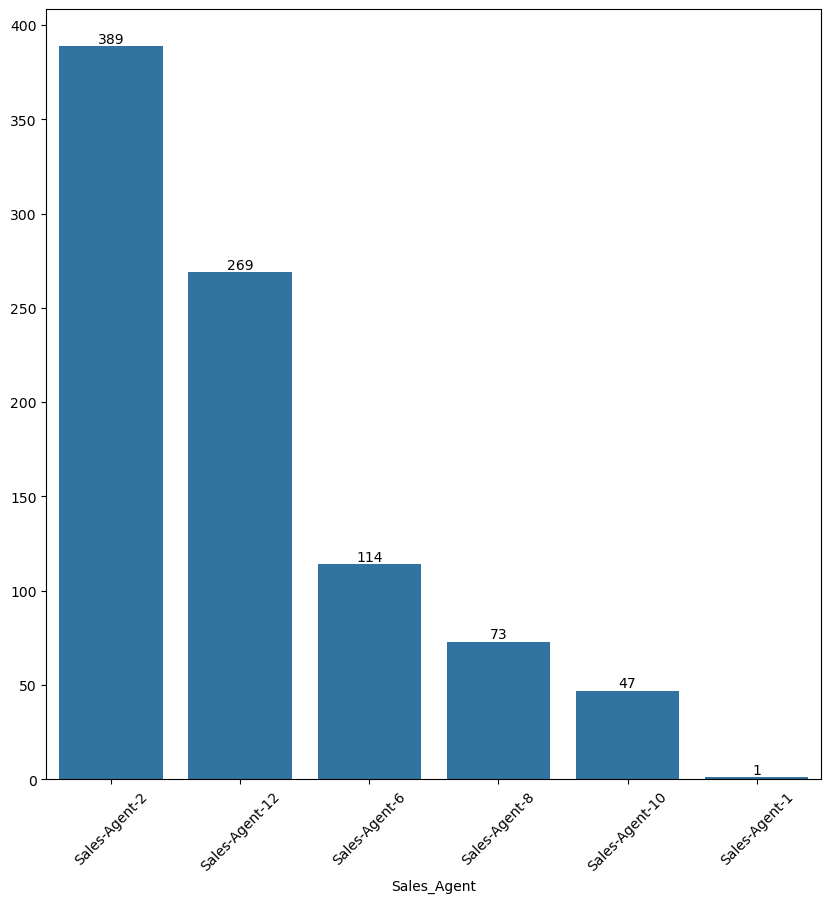

In [140]:
plt.figure(figsize=(10,10))

# Filter values where count is less than 400
values_less_than_400 = data['Sales_Agent'].value_counts()[data['Sales_Agent'].value_counts() < 400]

plt.xticks(rotation=45)

# Create a bar plot for values with counts less than 400
sns.barplot(x=values_less_than_400.index, y=values_less_than_400.values)

# Add labels to the bars
plt.gca().bar_label(plt.gca().containers[0])

plt.show()

## The above Sales_Agents are needs to improve their Product Sales.

In [142]:
# Save the DataFrame 'da' as a CSV file
data.to_csv('Dataset_EDA.csv', index=False)